In [5]:
import numpy as np 
import matplotlib.pyplot as plt

from astropy.io import fits

In [6]:
plt.rcParams.update({'axes.linewidth' : 1.5,
                     'ytick.major.width' : 1.5,
                     'ytick.minor.width' : 1.5,
                     'xtick.major.width' : 1.5,
                     'xtick.minor.width' : 1.5,
                     'xtick.labelsize': 12, 
                     'ytick.labelsize': 12,
                     'axes.labelsize': 18,
                     'axes.labelpad' : 5,
                     'axes.titlesize' : 22,
                     'axes.titlepad' : 10,
                     'font.family': 'Serif'
                    })

In [7]:
dir_crires_post = "/home/ktpha/chile-tellurics/post_date_obs/"
dir_crires_pre = "/home/ktpha/chile-tellurics/step32/cr2res_obs_nodding_combinedA.fits"
# sci_post_pattern = dir_crires_post + "*/SCIENCE_*.fits"
# correct_post_pattern = dir_crires_post + "*/CORRECTED_*.fits"

import stack_fits  # assuming your script is named stack_fits.py

# # Now call the functions as:
# files = stack_fits.find_all_sci_fits(dir_crires_post,)
# stacked = stack_fits.stack_fits_data(files)


In [8]:
sci_file = "SCIENCE_TELLURIC_CORR_cr2res_obs_nodding_extracted_combined.fits"
corr_file = "CORRECT_CHIPS_COMBINED_cr2res_obs_nodding_extracted_combined.fits"
direct = "/home/ktpha/chile-tellurics/post/2023-11-03T13:12:22.981/"
with fits.open(direct+sci_file) as hdul:
    sci_post = hdul[0].data
    # for hdu in hdul:
    #     print(hdu.name, hdu.data.columns if hdu.data is not None else None)
    fits.info(direct+sci_file)
    #cols = hdul[1].columns
    header = hdul[0].header

# print(sci_info)
#print(cols)
print(header)

#make a plot of time stamp vs airmass
print(header["HIERARCH ESO TEL AIRM START"])
print(header["HIERARCH ESO TEL AIRM END"])
print(header["MJD-OBS"])

Filename: /home/ktpha/chile-tellurics/post/2023-11-03T13:12:22.981/SCIENCE_TELLURIC_CORR_cr2res_obs_nodding_extracted_combined.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1600   ()      
  1                1 BinTableHDU     30   2047R x 4C   [1D, 1D, 1D, 1D]   
  2                1 BinTableHDU     30   2047R x 4C   [1D, 1D, 1D, 1D]   
  3                1 BinTableHDU     30   2048R x 4C   [1D, 1D, 1D, 1D]   
  4                1 BinTableHDU     30   2047R x 4C   [1D, 1D, 1D, 1D]   
  5                1 BinTableHDU     30   2047R x 4C   [1D, 1D, 1D, 1D]   
  6                1 BinTableHDU     30   2046R x 4C   [1D, 1D, 1D, 1D]   
  7                1 BinTableHDU     30   2046R x 4C   [1D, 1D, 1D, 1D]   
  8                1 BinTableHDU     30   2045R x 4C   [1D, 1D, 1D, 1D]   
  9                1 BinTableHDU     30   2045R x 4C   [1D, 1D, 1D, 1D]   
 10                1 BinTableHDU     30   2045R x 4C   [1D, 1D, 1D, 1D]   
 11  

In [ ]:
import numpy as np
from astropy.io import fits



result = stack_all_spectra(dir_crires_post)

if result:
    print("Wave shape:", result['wave'].shape)
    print("Flux shape:", result['flux'].shape)  # (n_files, n_points)


Wave shape: (40874,)
Flux shape: (20, 40874)


In [3]:
from simulate_spectra import tellurize_star

directory = "/mnt/c/Users/ktpha/Documents/Research/chile-tellurics/"
wave_file = "lte06000-4.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits"
index_file = "WAVE_PHOENIX-ACES-AGSS-COND-2011.fits"

wsl_path = "/home/ktpha/chile-tellurics/eso_skycalc_tellurics/"
tel_file = "LBL_A10_s0_R0060000_T.fits"

# wave, combined_flux = tellurize_star(directory + index_file, directory + wave_file, wsl_path + tel_file)
# plt.plot(wave, combined_flux, label="Stellar + Tellurics")

In [5]:
from pca_subtraction import *

import glob
import os

np.random.seed(42)  # For reproducibility

# Define the pattern for your season (e.g., all A10, A15, A20, etc. with s0)
pattern = os.path.join(wsl_path, "LBL_A*_s*_R0060000_T.fits")
telluric_files = sorted(glob.glob(pattern))

results = []

# Load in each telluric file and apply the tellurics
for telluric_file in telluric_files:
    wave, combined_flux = tellurize_star(
        directory + index_file,
        directory + wave_file,
        telluric_file
    )

    # Simulate Poisson noise (photon counting)
    poisson_noise = np.random.poisson(combined_flux)

    # Simulate Gaussian noise (readout noise, thermal, etc.)
    gaussian_std = 5.0  # adjust as needed, in same units as signal (e.g. counts or flux)
    gaussian_noise = np.random.normal(0, gaussian_std, size=combined_flux.shape)

    # plt.plot(wave, gaussian_noise)
    # plt.title("Gaussian Noise")
    # plt.xlabel("Wavelength (Angstrom)")
    # plt.ylabel("Flux")

    base_flux = poisson_noise + gaussian_noise

    results.append((telluric_file, wave, base_flux))

# Stack all spectra into a 2D array: shape (num_spectra, num_wavelengths)
all_flux = np.array([result[2] for result in results])

with_telluric_tdm, with_telluric_wdm = run_pca_subtraction(all_flux, wave, start_wav=14000, end_wav=14100, component_count=1)
tdm_reconstructed, wdm_reconstructed = run_pca_subtraction(all_flux, wave, start_wav=14000, end_wav=14100, component_count=2)

ValueError: too many values to unpack (expected 2)

In [ ]:
from scipy.interpolate import interp1d

# Load the telluric spectrum
with fits.open(wsl_path + tel_file) as hdu:
    telluric = hdu[1].data

telluric_wavelength_angstrom = telluric['lam'] * 1e4

# Interpolate telluric transmission onto the stellar wavelength grid
telluric_interp = interp1d(telluric_wavelength_angstrom, telluric['trans'], bounds_error=False, fill_value=1.0)
telluric_on_stellar = telluric_interp(wave)

start_idx, end_idx = convert_range_to_indices(wave, 14000, 14100)

with_telluric_tdm = tdm_reconstructed
with_telluric_wdm = wdm_reconstructed

print("tdm_reconstructed shape:", tdm_reconstructed.shape)
print("start_idx:", start_idx, "end_idx:", end_idx)
print("with_telluric_tdm shape:", with_telluric_tdm.shape)

plt.plot(wave[start_idx:end_idx], normalize(with_telluric_tdm[:,0]) + 2, label="TDM Reconstructed", color='blue')
plt.plot(wave[start_idx:end_idx], normalize(with_telluric_wdm[0,:]) + 1, label="WDM Reconstructed", color='orange')
plt.plot(wave[start_idx:end_idx], normalize(telluric_on_stellar[start_idx:end_idx]), label="Telluric Spectrum", color='green', linestyle='--')

plt.plot(wave[start_idx:end_idx], normalize(with_telluric_tdm[:,0]) - 1 - normalize(telluric_on_stellar[start_idx:end_idx]), label="TDM Residual", color='blue', linestyle='--')
plt.plot(wave[start_idx:end_idx], normalize(with_telluric_wdm[0,:]) - 2 - normalize(telluric_on_stellar[start_idx:end_idx]), label="WDM Residual", color='orange', linestyle='--')

plt.xlabel("Wavelength (Angstrom)")
plt.ylabel("Flux")
plt.title("TDM and WDM Reconstructed Spectra")
plt.legend()

NameError: name 'tdm_reconstructed' is not defined

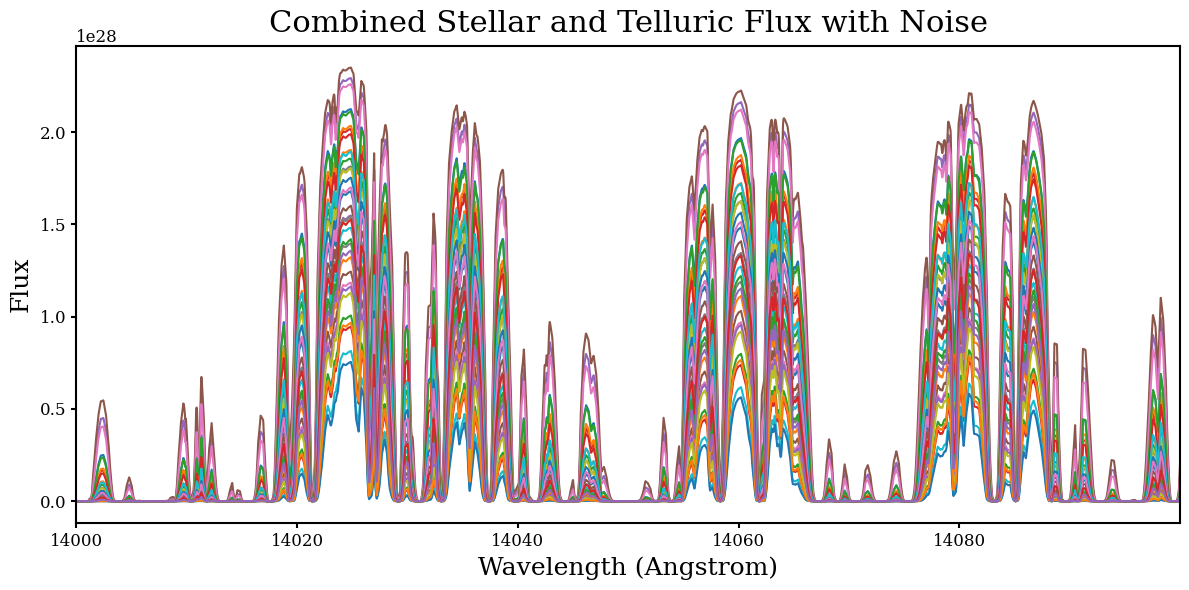

In [8]:
import numpy as np
import matplotlib.pyplot as plt

pattern = os.path.join(wsl_path, "LBL_A*_s*_R0060000_T.fits")
telluric_files = sorted(glob.glob(pattern))

plt.figure(figsize=(12, 6))
max_legends = 10  # Only show legend for first 10 files

for i, telluric_file in enumerate(telluric_files):
    try:
        wave, combined_flux, telluric_on_stellar = tellurize_star(
            directory + index_file,
            directory + wave_file,
            telluric_file
        )

        start_idx, end_idx = convert_range_to_indices(wave, 14000, 14100)

        # Simulate Poisson noise (photon counting)
        poisson_noise = np.random.poisson(combined_flux)

        # Simulate Gaussian noise (readout noise, thermal, etc.)
        gaussian_std = 5.0
        gaussian_noise = np.random.normal(0, gaussian_std, size=combined_flux.shape)

        # Ensure arrays are the same length and not empty
        if wave.size == 0 or combined_flux.size == 0:
            print(f"Skipping {telluric_file}: empty array")
            continue

        # Remove NaNs/Infs
        mask = np.isfinite(wave) & np.isfinite(combined_flux) & np.isfinite(poisson_noise) & np.isfinite(gaussian_noise)
        if not np.all(mask):
            wave = wave[mask]
            combined_flux = combined_flux[mask]
            poisson_noise = poisson_noise[mask]
            gaussian_noise = gaussian_noise[mask]

        # Plot only the desired wavelength range
        plot_mask = (wave >= wave[start_idx]) & (wave <= wave[end_idx-1])
        if not np.any(plot_mask):
            print(f"Skipping {telluric_file}: no data in plot range")
            continue

        y = combined_flux[plot_mask] * poisson_noise[plot_mask] + gaussian_noise[plot_mask]
        label = telluric_file.split('/')[-1] if i < max_legends else None
        plt.plot(wave[plot_mask], y, label=label)

    except Exception as e:
        print(f"Error with {telluric_file}: {e}")
        continue

# if max_legends > 0:
#     plt.legend()
plt.title("Combined Stellar and Telluric Flux with Noise")
plt.xlabel("Wavelength (Angstrom)")
plt.ylabel("Flux")
plt.xlim(wave[start_idx], wave[end_idx-1])
plt.tight_layout()
plt.show()

In [49]:
def plot_spectral_square(spectra_array, wave, title=None):
    plt.figure(figsize=(10, 5))
    plt.imshow(spectra_array, aspect='auto', 
            extent=[wave[0], wave[-1], 0, spectra_array.shape[0]],
            origin='lower', cmap='viridis')
    plt.colorbar(label='Flux')
    plt.xlabel('Wavelength')
    plt.ylabel('Spectrum Index')
    if title:
        plt.title(title)
    else:
        plt.title('Spectral Square Plot')
    plt.show()

def normalize(array):
    """Normalize a 1D numpy array to the range 0-1."""
    arr_min = np.min(array)
    arr_max = np.max(array)
    if arr_max == arr_min:
        return np.zeros_like(array)  # Avoid division by zero
    return (array - arr_min) / (arr_max - arr_min)

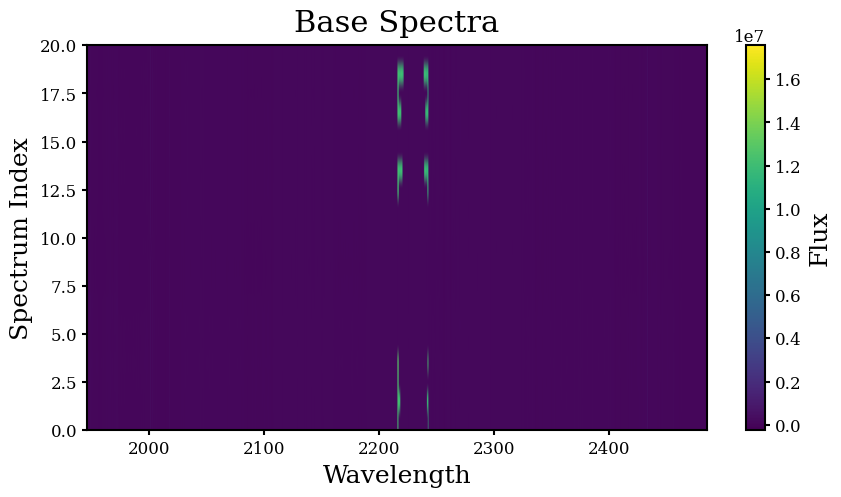

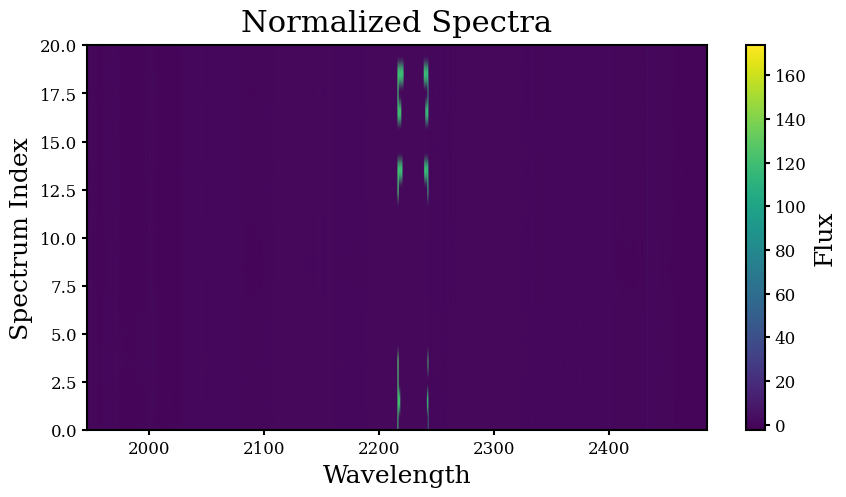

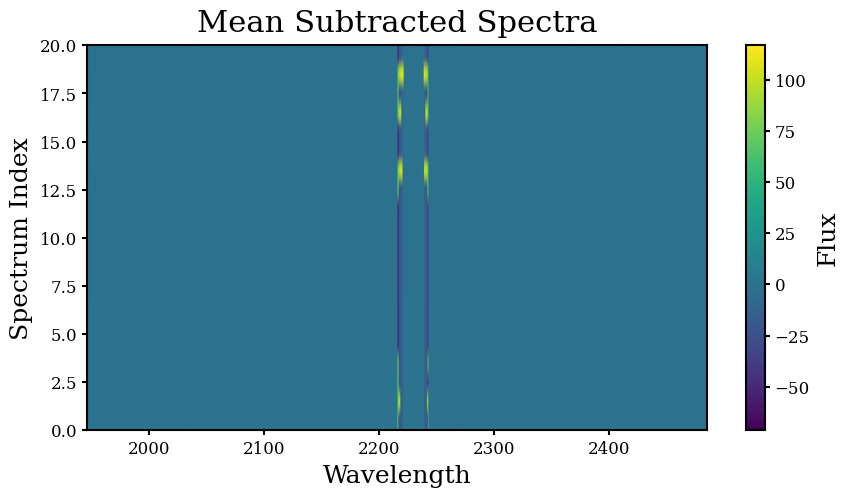

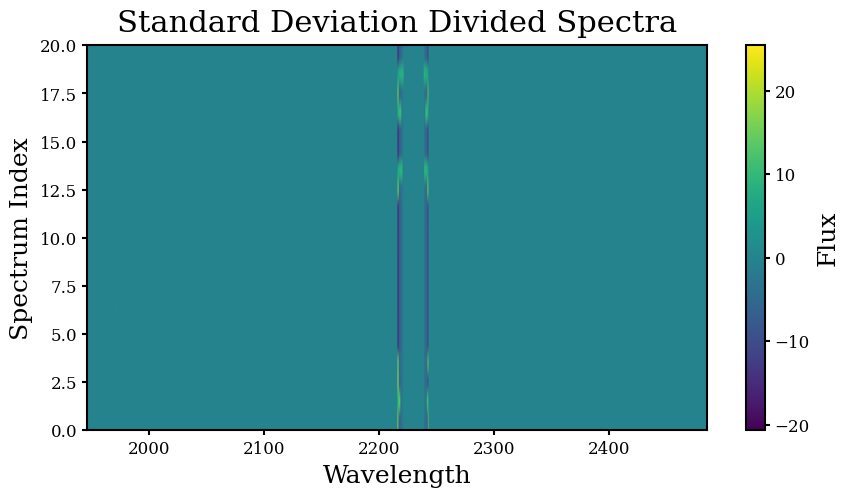

In [55]:
result = stack_all_spectra(dir_crires_post)
all_flux = result['flux']  # shape: (num_spectra, num_wavelengths)
wave = result['wave']  # shape: (num_wavelengths,)

plot_spectral_square(all_flux, wave, title="Base Spectra")

# Normalize by the median of this spectrum
norm_flux = all_flux / np.median(all_flux)

plot_spectral_square(norm_flux, wave, title="Normalized Spectra")

# Compute the mean at each wavelength (column)
mean_flux = np.mean(norm_flux, axis=0)

# Subtract the mean from each spectrum
mean_subtracted_flux = norm_flux - mean_flux  # shape: (num_spectra, num_wavelengths)

plot_spectral_square(mean_subtracted_flux, wave, title="Mean Subtracted Spectra")

# Compute the standard deviation for each spectrum (row)
row_std = np.std(mean_subtracted_flux, axis=1, keepdims=True)  # shape: (num_spectra, 1)

# Divide each row by its own standard deviation
row_std_divided_flux = mean_subtracted_flux / row_std  # shape: (num_spectra, num_wavelengths)

plot_spectral_square(row_std_divided_flux, wave, title="Standard Deviation Divided Spectra")

# #Plot the mean subtracted spectra
# plt.figure(figsize=(10,8))
# for i, (telluric_file, wave, flux) in enumerate(results):
#     plt.plot(wave, flux, label=os.path.basename(telluric_file))
# plt.xlabel("Wavelength (Angstrom)")
# plt.ylabel("Flux")
# plt.legend()
# plt.title("Stellar + Tellurics + Noise for Different Airmass")
# plt.show()

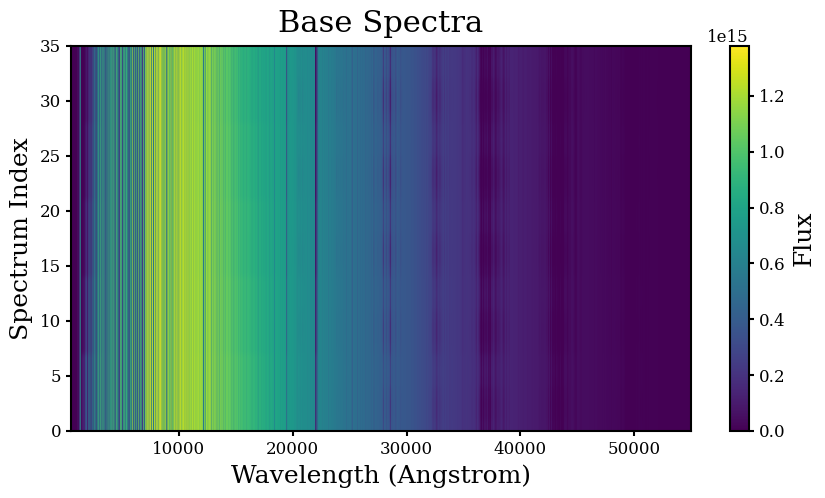

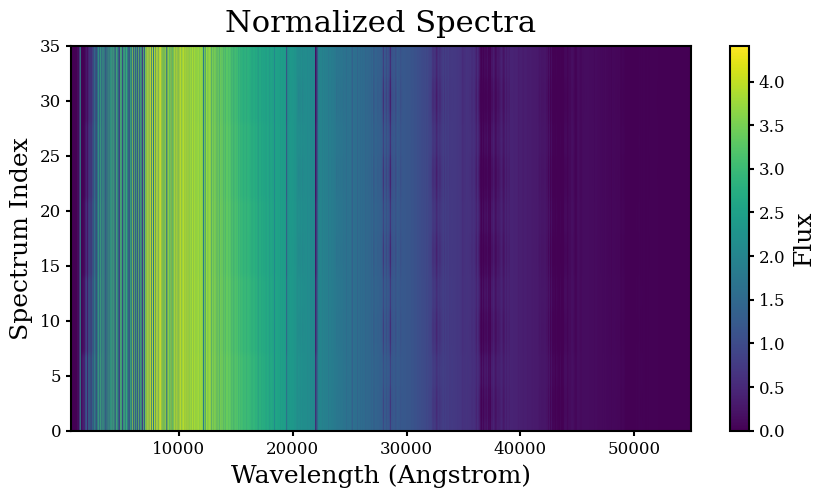

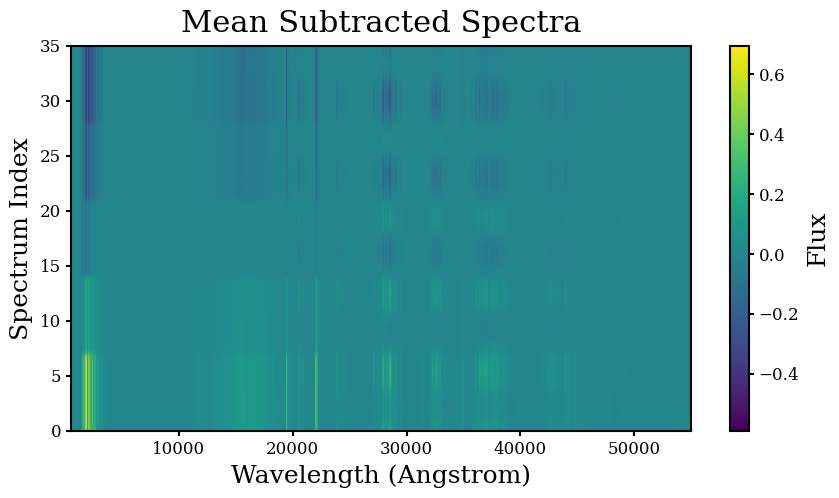

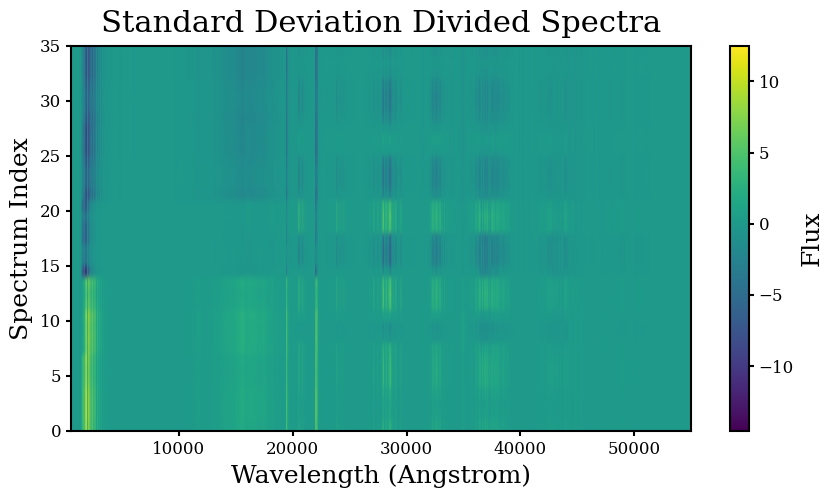

In [ ]:
import glob
import os

"""Simulate telluric spectra with noise and perform normalization"""

np.random.seed(42)  # For reproducibility

# Define the pattern for your season (e.g., all A10, A15, A20, etc. with s0)
pattern = os.path.join(wsl_path, "LBL_A*_s*_R0060000_T.fits")
telluric_files = sorted(glob.glob(pattern))

results = []

# Load in each telluric file and apply the tellurics
for telluric_file in telluric_files:
    wave, combined_flux, telluric_on_stellar = tellurize_star(
        directory + index_file,
        directory + wave_file,
        telluric_file
    )

    # Simulate Poisson noise (photon counting)
    poisson_noise = np.random.poisson(combined_flux)

    # Simulate Gaussian noise (readout noise, thermal, etc.)
    gaussian_std = 5.0  # adjust as needed, in same units as signal (e.g. counts or flux)
    gaussian_noise = np.random.normal(0, gaussian_std, size=combined_flux.shape)

    # plt.plot(wave, gaussian_noise)
    # plt.title("Gaussian Noise")
    # plt.xlabel("Wavelength (Angstrom)")
    # plt.ylabel("Flux")

    base_flux = poisson_noise + gaussian_noise

    results.append((telluric_file, wave, base_flux))

# Stack all spectra into a 2D array: shape (num_spectra, num_wavelengths)
all_flux = np.array([result[2] for result in results])

plot_spectral_square(all_flux, wave, title="Base Spectra")

# Normalize by the median of this spectrum
norm_flux = all_flux / np.median(all_flux)

plot_spectral_square(norm_flux, wave, title="Normalized Spectra")

# Compute the mean at each wavelength (column)
mean_flux = np.mean(norm_flux, axis=0)

# Subtract the mean from each spectrum
mean_subtracted_flux = norm_flux - mean_flux  # shape: (num_spectra, num_wavelengths)

plot_spectral_square(mean_subtracted_flux, wave, title="Mean Subtracted Spectra")

# Compute the standard deviation for each spectrum (row)
row_std = np.std(mean_subtracted_flux, axis=1, keepdims=True)  # shape: (num_spectra, 1)

# Divide each row by its own standard deviation
row_std_divided_flux = mean_subtracted_flux / row_std  # shape: (num_spectra, num_wavelengths)

plot_spectral_square(row_std_divided_flux, wave, title="Standard Deviation Divided Spectra")

# Set results to final flux values
results = [(telluric_file, wave, row_std_divided_flux[i]) for i, (telluric_file, wave, _) in enumerate(results)]

# #Plot the mean subtracted spectra
# plt.figure(figsize=(10,8))
# for i, (telluric_file, wave, flux) in enumerate(results):
#     plt.plot(wave, flux, label=os.path.basename(telluric_file))
# plt.xlabel("Wavelength (Angstrom)")
# plt.ylabel("Flux")
# plt.legend()
# plt.title("Stellar + Tellurics + Noise for Different Airmass")
# plt.show()

In [36]:
# print(wave.shape)
# print((wave[-1] - wave[0]) / wave.shape[0])  # Wavelength step size

def convert_range_to_indices(wave, start, end):
    """Convert a wavelength range to indices."""
    start_index = np.searchsorted(wave, start)
    end_index = np.searchsorted(wave, end)
    return start_index, end_index

In [37]:
start_idx, end_idx = convert_range_to_indices(wave, 2200, 2300)
print(f"Indices range: {-1*start_idx + end_idx}")

Indices range: 7981


In [45]:
tdm_covariance = np.cov(row_std_divided_flux[:, start_idx:end_idx].T, rowvar=False)
wdm_covariance = np.cov(row_std_divided_flux[:, start_idx:end_idx], rowvar=False)

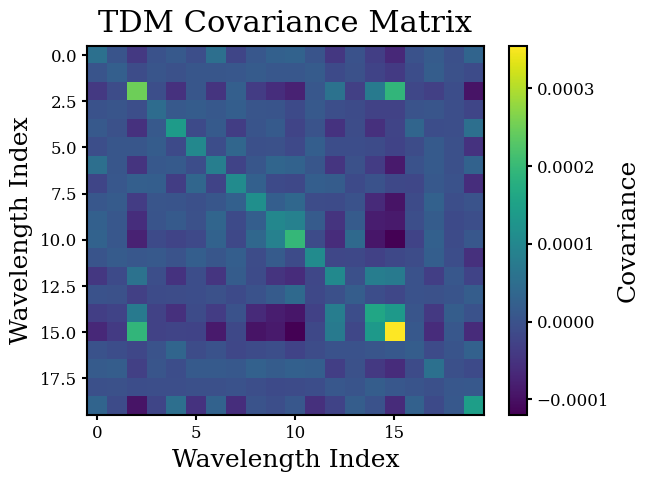

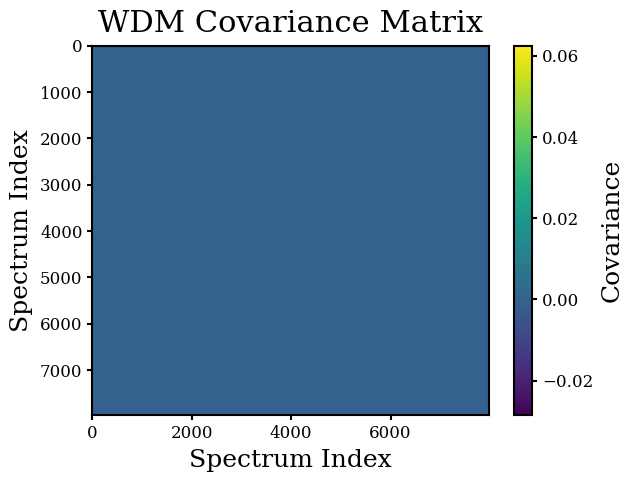

In [46]:
plt.imshow(tdm_covariance, cmap='viridis', aspect='auto')
plt.colorbar(label='Covariance')
plt.title("TDM Covariance Matrix")
plt.xlabel("Wavelength Index")
plt.ylabel("Wavelength Index")
plt.show()

plt.imshow(wdm_covariance, cmap='viridis', aspect='auto')
plt.colorbar(label='Covariance')    
plt.title("WDM Covariance Matrix")
plt.xlabel("Spectrum Index")
plt.ylabel("Spectrum Index")
plt.show()

In [47]:
def compute_eigenvalues_and_vectors(covariance_matrix):
    """Compute eigenvalues and eigenvectors of the covariance matrix."""
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    # Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

In [ ]:
eval_tdm, evec_tdm  = compute_eigenvalues_and_vectors(tdm_covariance)
eval_wdm, evec_wdm = compute_eigenvalues_and_vectors(wdm_covariance)

def plot_eigenvectors(eigenvectors, title=None):
    fig, axes = plt.subplots(5, 1, figsize=(10, 12), sharex=True)
    for i in range(5):
        axes[i].plot(normalize(eigenvectors[:, i]), label=f'Eigenvector {i+1}')
        #axes[i].plot(normalize(telluric_on_stellar[start_idx:end_idx]), label="Telluric Spectrum", color='green', linestyle='--')
        axes[i].set_ylabel('Value')
        axes[i].legend(loc='upper right')
        if i == 0 and title:
            axes[i].set_title(title)
    axes[-1].set_xlabel('Index')
    plt.tight_layout()
    plt.show()

plot_eigenvectors(evec_tdm, title="TDM Eigenvectors")
plot_eigenvectors(evec_wdm, title="WDM Eigenvectors")

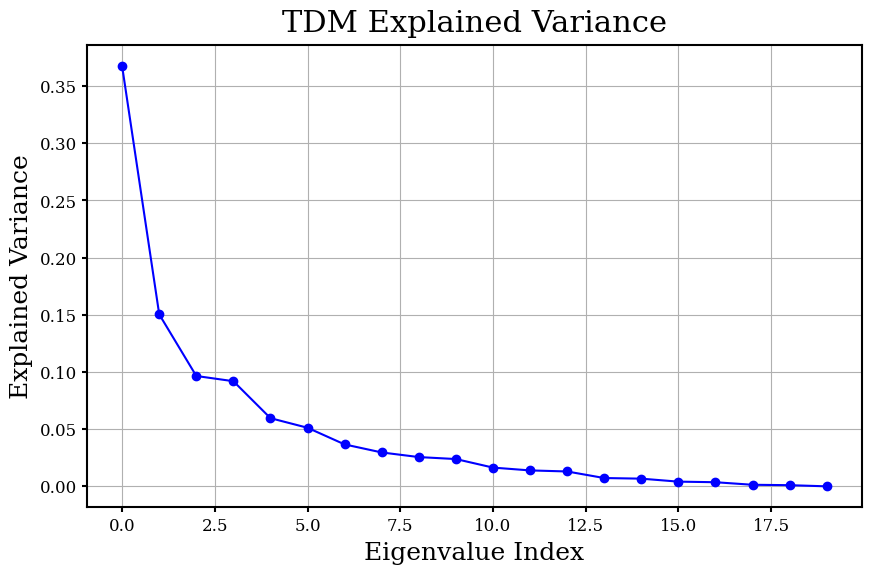

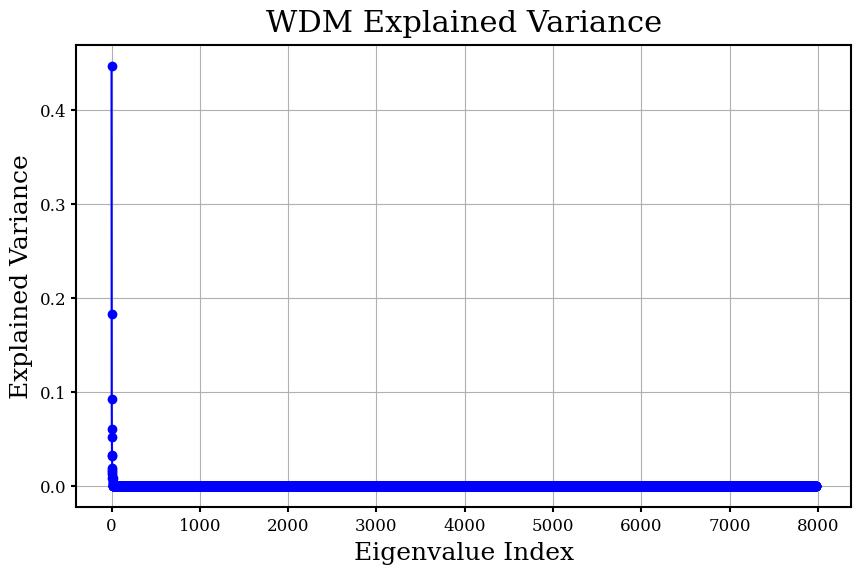

In [51]:
def explained_variance(eigenvalues):
    """Calculate the explained variance from eigenvalues."""
    total_variance = np.sum(eigenvalues)
    return eigenvalues / total_variance

def plot_explained_variance(eigenvalues, title=None):
    """Plot the explained variance from eigenvalues."""
    explained_var = explained_variance(eigenvalues)
    plt.figure(figsize=(10, 6))
    plt.plot(explained_var, marker='o', linestyle='-', color='b')
    plt.title('Explained Variance by Eigenvalues' if title is None else title)
    plt.xlabel('Eigenvalue Index')
    plt.ylabel('Explained Variance')
    plt.grid()
    plt.show()
plot_explained_variance(eval_tdm, title="TDM Explained Variance")
plot_explained_variance(eval_wdm, title="WDM Explained Variance")

In [19]:
print("EVR for TDM:", explained_variance(eval_tdm))
print("EVR for WDM:", explained_variance(eval_wdm))

EVR for TDM: [9.01437427e-01 9.69678930e-02 1.13925134e-03 3.57963655e-04
 4.20439105e-05 1.73935539e-05 1.30773577e-05 1.04878642e-05
 7.13146763e-06 2.64121295e-06 1.65580320e-06 1.14153983e-06
 4.95304323e-07 3.29087565e-07 2.80150867e-07 2.08112859e-07
 1.33232849e-07 1.14961528e-07 8.35173215e-08 6.16544793e-08
 4.33390078e-08 3.31792669e-08 2.44328557e-08 1.75039091e-08
 1.63578392e-08 1.53118342e-08 1.03729099e-08 8.95155669e-09
 5.09286118e-09 3.70102424e-09 2.96592193e-09 2.22145294e-09
 1.87825140e-09 9.64841007e-10 2.00922195e-17]
EVR for WDM: [ 9.94244708e-01  5.60937951e-03  1.30860884e-04 ... -6.33002712e-16
 -7.18162639e-16 -9.02664177e-16]


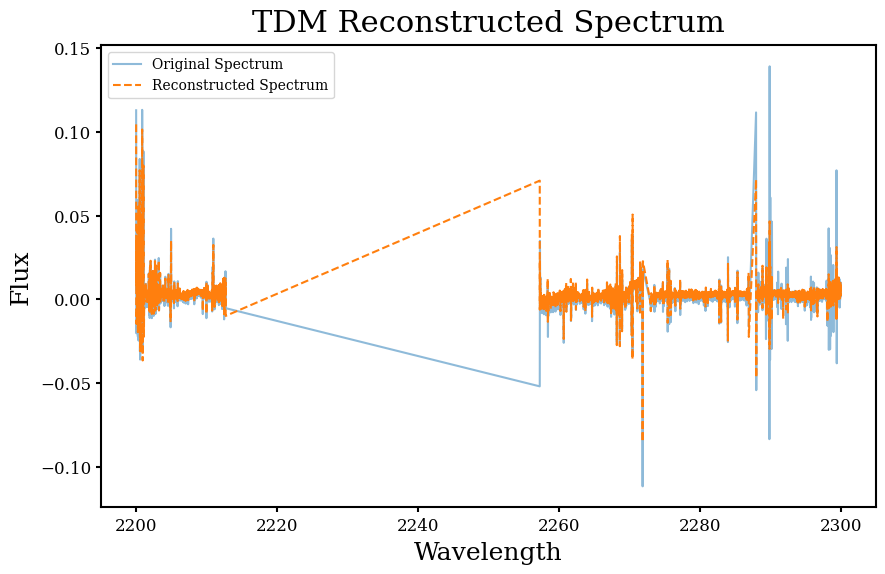

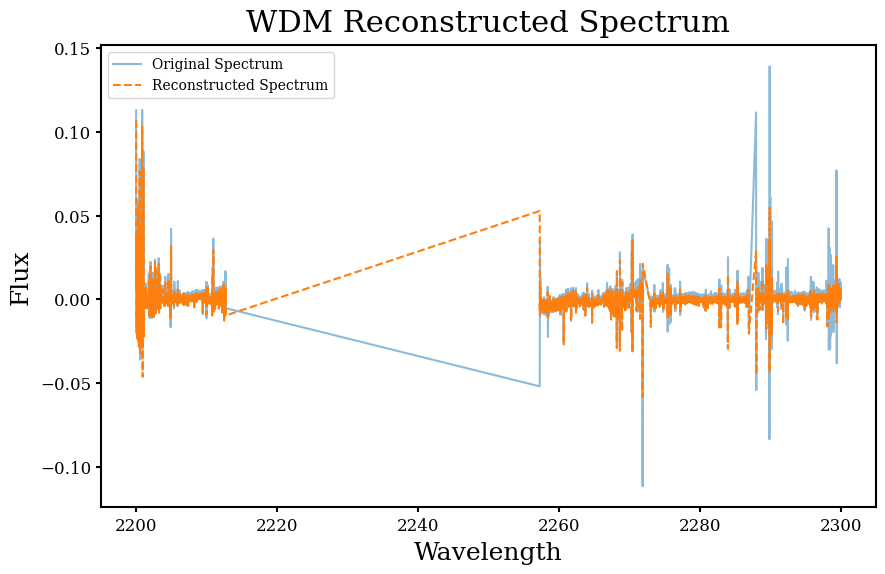

(7981, 20)
(20, 7981)


In [54]:
def remove_components(data, eigenvectors, num_components):

    projection_matrix = eigenvectors[:, num_components:-1]
    projected_data = np.dot(data, projection_matrix)

    return np.dot(projected_data, projection_matrix.T)  # Pseudo-inverse for reconstruction

# Number of components to remove
component_count = 2

# Remove components from TDM and WDM
tdm_reconstructed = remove_components(row_std_divided_flux[:, start_idx:end_idx].T, evec_tdm, component_count)
wdm_reconstructed = remove_components(row_std_divided_flux[:, start_idx:end_idx], evec_wdm, component_count)

def plot_reconstructed_spectra(original, reconstructed, wave, title=None):
    plt.figure(figsize=(10, 6))
    plt.plot(wave, original[0], label='Original Spectrum', alpha=0.5)
    plt.plot(wave, reconstructed[0], label='Reconstructed Spectrum', linestyle='--')
    plt.xlabel('Wavelength')
    plt.ylabel('Flux')
    if title:
        plt.title(title)
    else:
        plt.title('Original vs Reconstructed Spectrum')
    plt.legend()
    plt.show()

plot_reconstructed_spectra(row_std_divided_flux[:, start_idx:end_idx], tdm_reconstructed.T, wave[start_idx:end_idx], title="TDM Reconstructed Spectrum")
plot_reconstructed_spectra(row_std_divided_flux[:, start_idx:end_idx], wdm_reconstructed, wave[start_idx:end_idx], title="WDM Reconstructed Spectrum")

print(tdm_reconstructed.shape)
print(wdm_reconstructed.shape)

In [1]:
import glob
import os

# Define the pattern for your season (e.g., all A10, A15, A20, etc. with s0)
pattern = os.path.join(wsl_path, "LBL_A*_s0_R0060000_T.fits")
telluric_files = sorted(glob.glob(pattern))

results = []

plt.figure(figsize=(10,8))

# Load in each telluric file and apply the tellurics
for telluric_file in telluric_files:
    wave, combined_flux = tellurize_star(
        directory + index_file,
        directory + wave_file,
        telluric_file
    )

    with fits.open(telluric_file) as hdu:
        telluric = hdu[1].data
        telluric_wavelength_angstrom = telluric['lam'] * 1e4

    # Normalize by the median of this spectrum
    norm_flux = combined_flux / np.median(combined_flux)
    results.append((telluric, wave, norm_flux))
    plt.plot(telluric_wavelength_angstrom, telluric['trans'], label=os.path.basename(telluric_file))
    
    plt.xlabel("Wavelength (Angstrom)")
    plt.ylabel("Transmission Fraction") 
    plt.legend()
    plt.title("Tellurics for Different Airmass")
    plt.xlim(start_idx, end_idx)

plt.show()


NameError: name 'wsl_path' is not defined